# Predictors of Dementia

## Problem -
* Research on dementia prevalence and potentially related risk factors is scarce
* There are no disease-modifying agents for dementia
* Prevention and intervention measures for high-risk populations is desired

One of the topics I'm interested in under health as a whole, is prevention and intervention strategies for healthy aging. One disease that falls under that category is dementia. Currently, there are no disease-modifying agents for dementia. The goal of my project is to analyze various lifestyle factors and their role in either the prevention or mitigation of dementia onset in an individual. For example, what types of food should an individual be limiting or eating more of, or what types of leisure actitivities should an individual be focusing their time on to promote healthy cognition as they age? For high-risk populations, implementing an evidence-based approach to prevention programs that are focused on local contexts and risk factors is important to design effective interventions and ultimatley appropriate public health policies.

## Background - 
* Evidence of decline in the prevalence of dementia in high-income countries
* Lifestyle activities that optimize use of cognitive strategies and healthy dietary patterns might help preserve cognition

## Data -
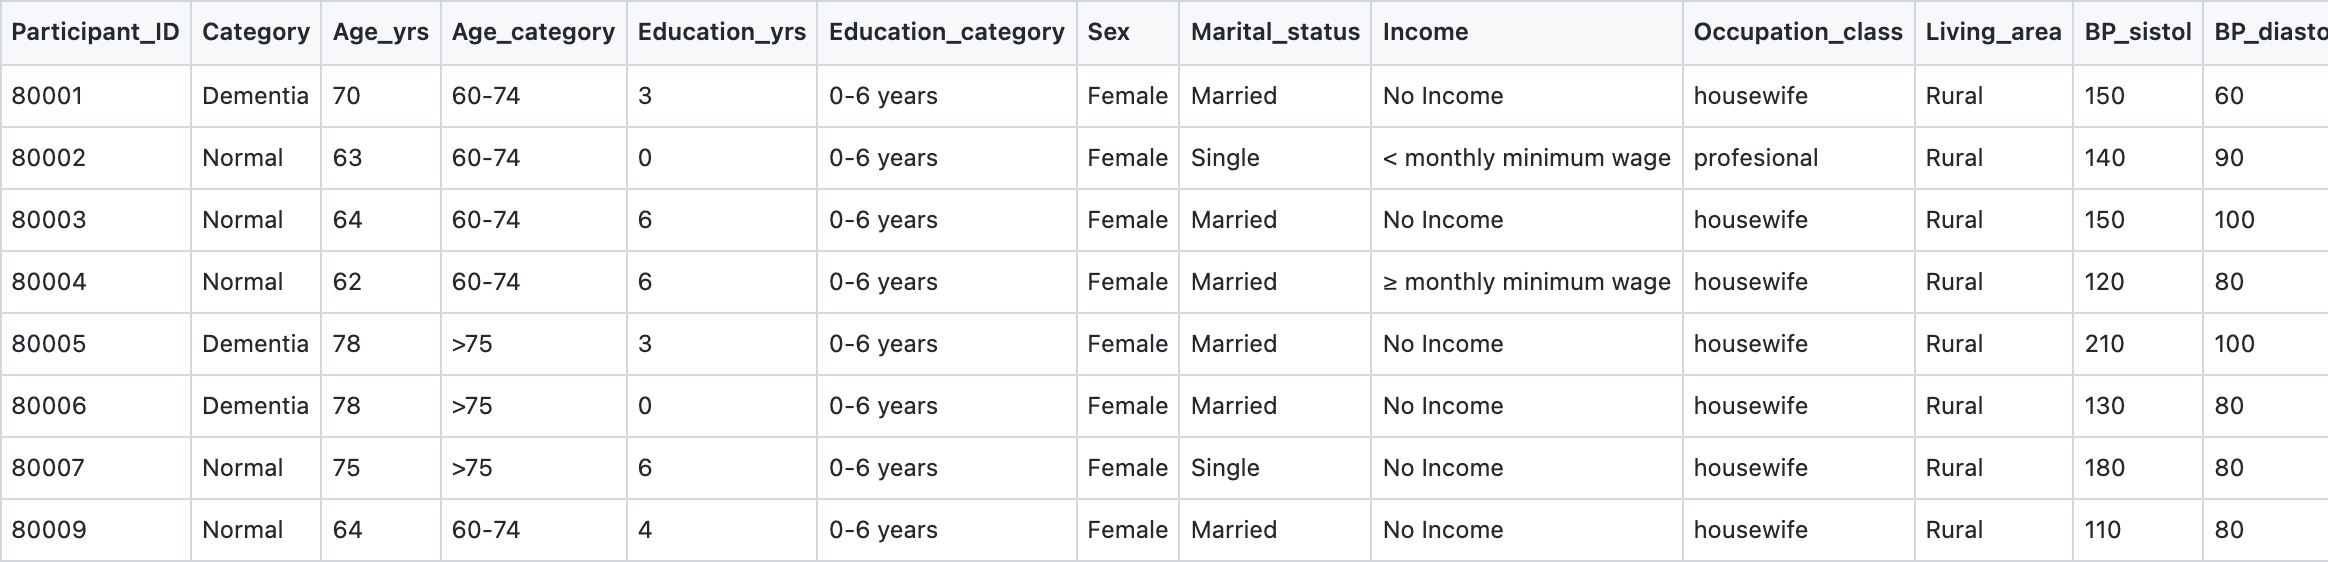

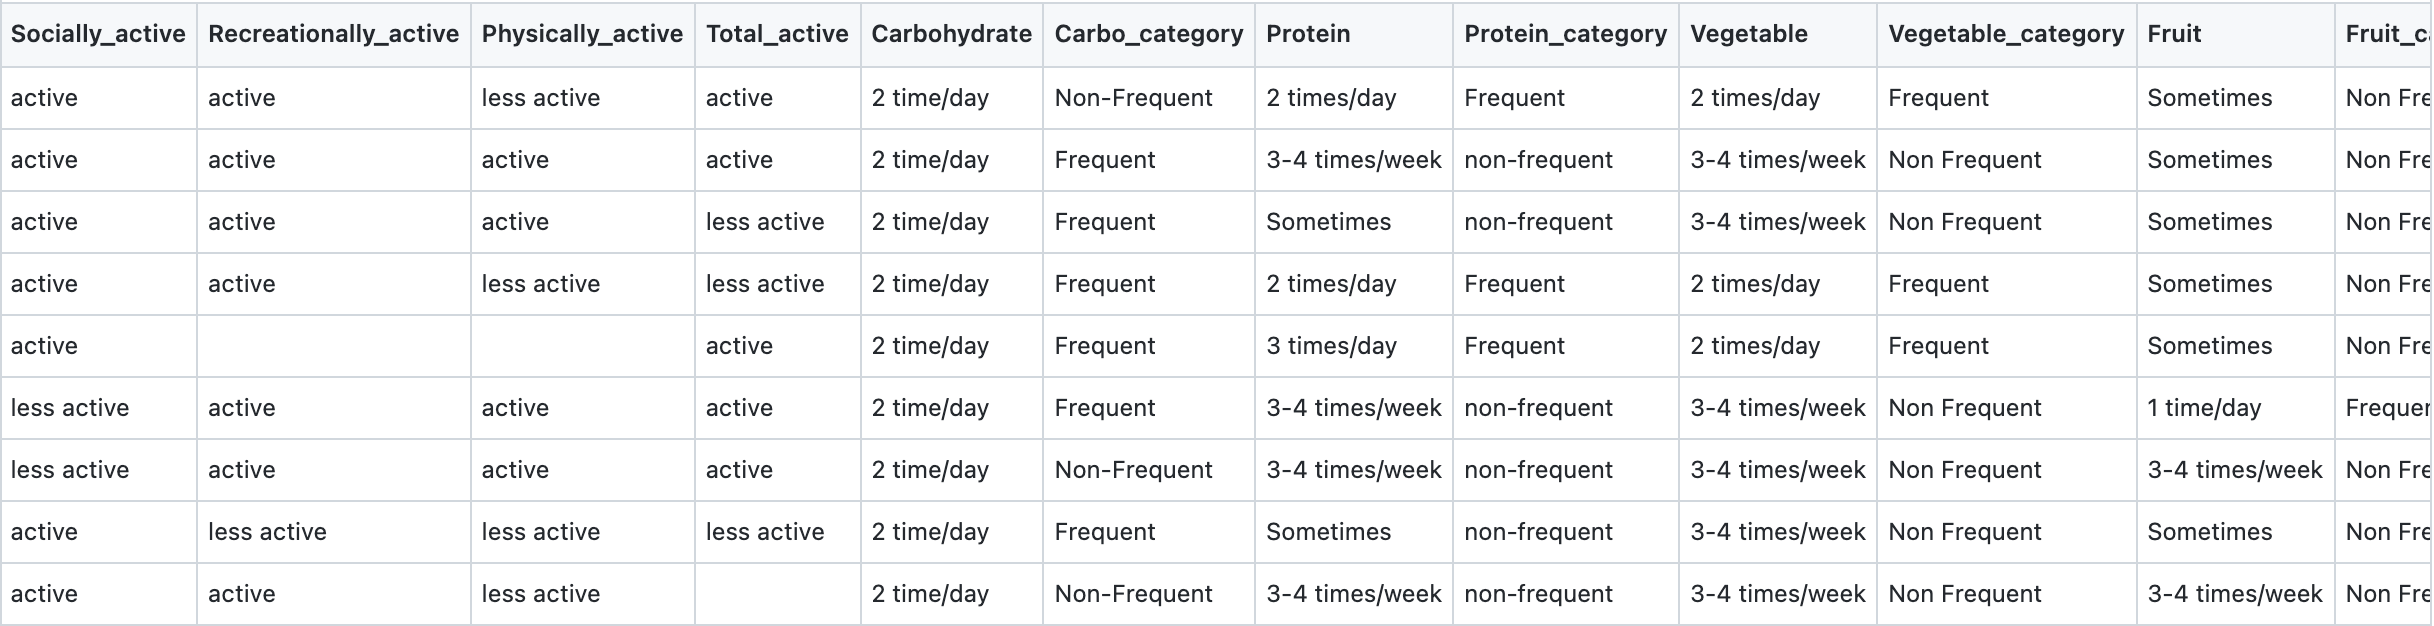

I had originially wanted to focus in on specifically Alzheimer's disease for this project, but as I mentioned at the beginning of this video, research on dementia that is focused specifically on lifestyle and diet risk factors is scarce. I was finding lots of data that was highly scientific, that contained things like brain scans, more in-depth biomarkers, or simply things I didn't have the knowledge to comprehend. So, I broadened my search to dementia as a whole, and was able to locate this public NIH (or National Institutes of Health) dataset. The study data I found is on 686 individuals from Indonesia. Indonesia is a middle-income country with large numbers of elders and limited healthcare resources. The data seeks to identify the modifiable risk factors for dementia, focusing on sociodemographic, health, and lifestyle risk factors, including things like leisure activities and dietary patterns. This is just a snapshot of the dataset, you can see demographics for each participant, (SCROLL DOWN) and then things like activity levels and frequency that an individual eats certain categories of foods.

## Considered Methods - 

## Considered Methods (cont.) -

## Methods Used -
Preliminary Statistics: counts, means, etc.
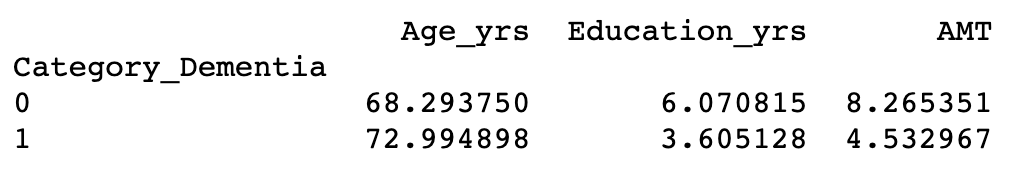

## Methods Used -

## Preliminary Results -
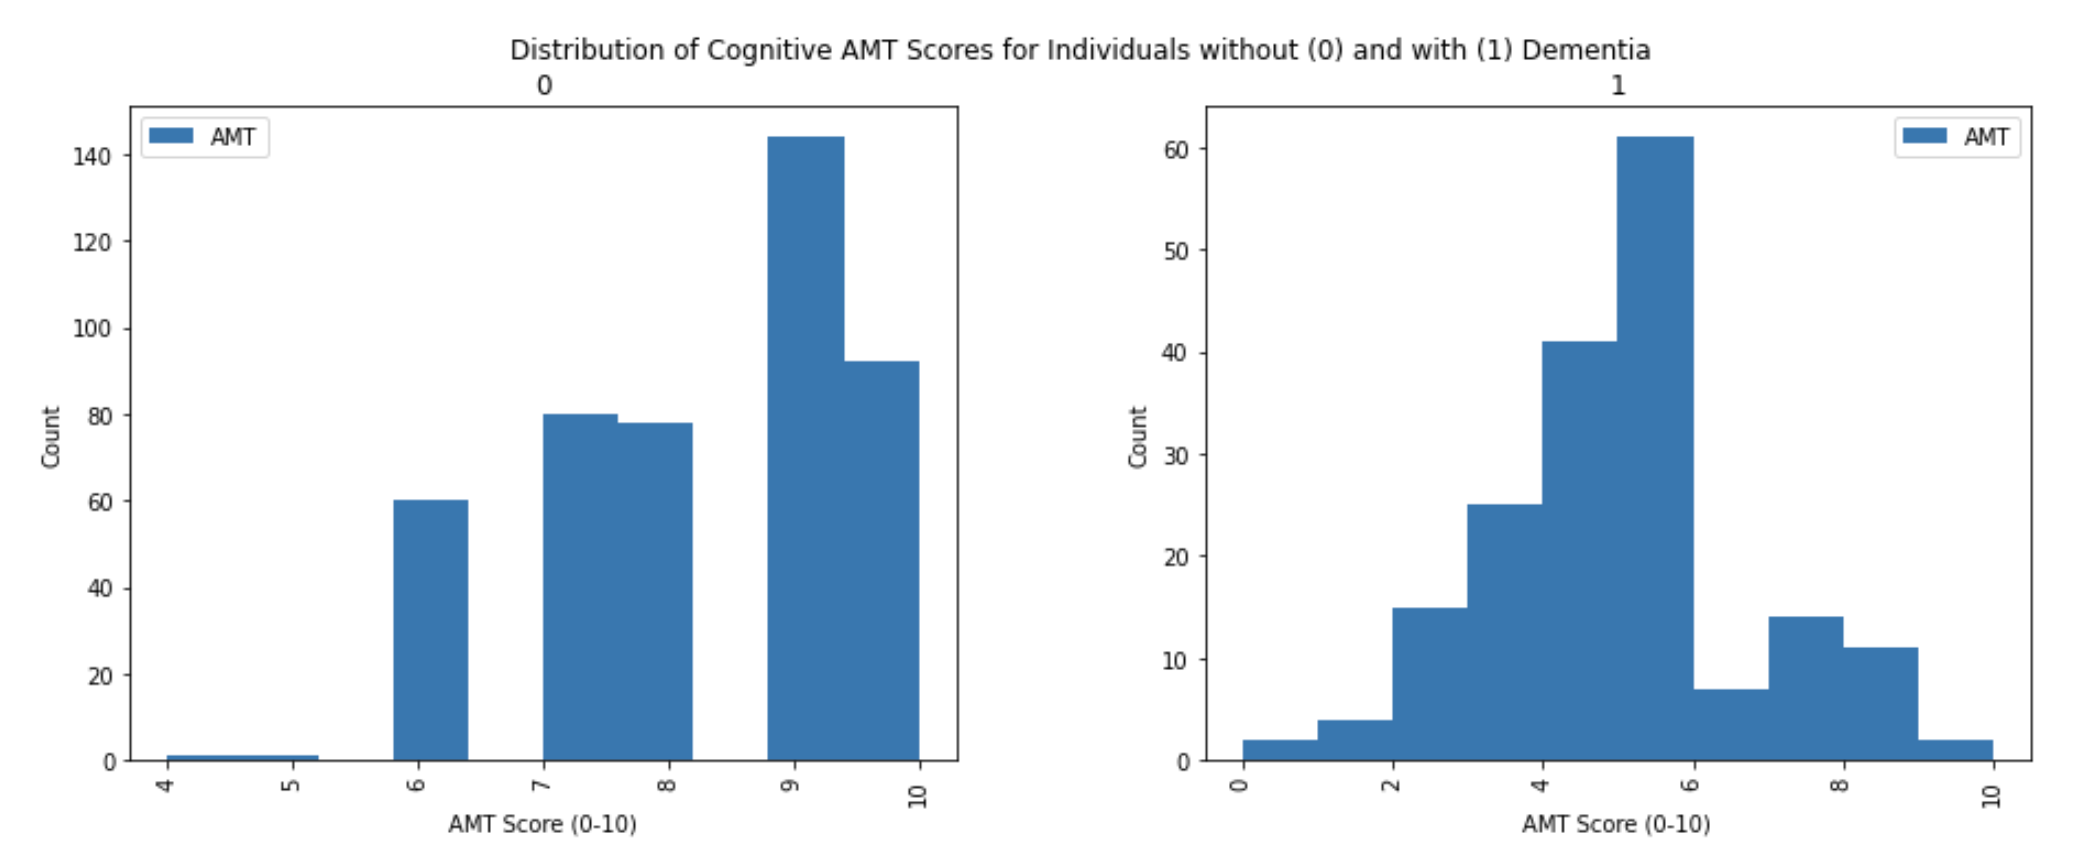

## Preliminary Results -

## Conclusion -

## Lessons Learned -

## Continuation Plans -